In [ ]:
import json
import requests
import io
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import re
from collections import Counter
from collections import defaultdict
from google.colab import files




Count of Barktypes {'smooth': 20, 'ridges or furrowed': 29, 'block scale or plates': 3, 'resin blisters': 2, 'scaly': 22, 'peeling': 19, 'striped': 1, 'mottled': 12, 'burling': 4, 'warty': 2, 'fibrous': 11, 'cauliflory': 2, 'ridges': 1}
Count of blank barktypes:  297


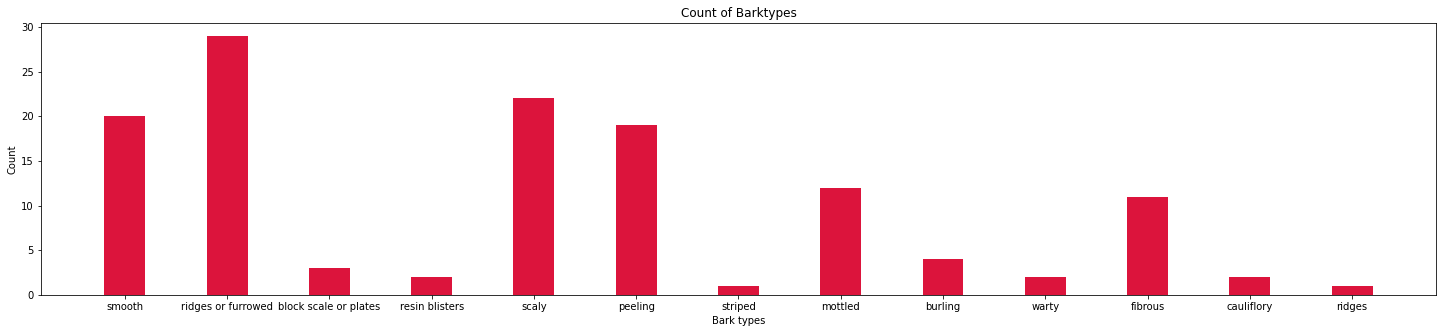



Count of Needles:  {'slightly sharp/blunt end': 2, 'curved': 2, 'flattened': 8, 'notched-tip': 3, 'central groove': 3, 'white lines underneath': 4, 'flattened sprays': 8, 'slightly soft/blunt end': 1, 'white on the top': 1, 'appressed': 3, 'white spores underneath': 1, 'feathery': 2, 'awl-shaped': 5, 'scale-like': 4, 'slightly sharp/pointed end': 2, 'two-ranked': 1, 'lanceolate': 1}
Count of blank needles:  59


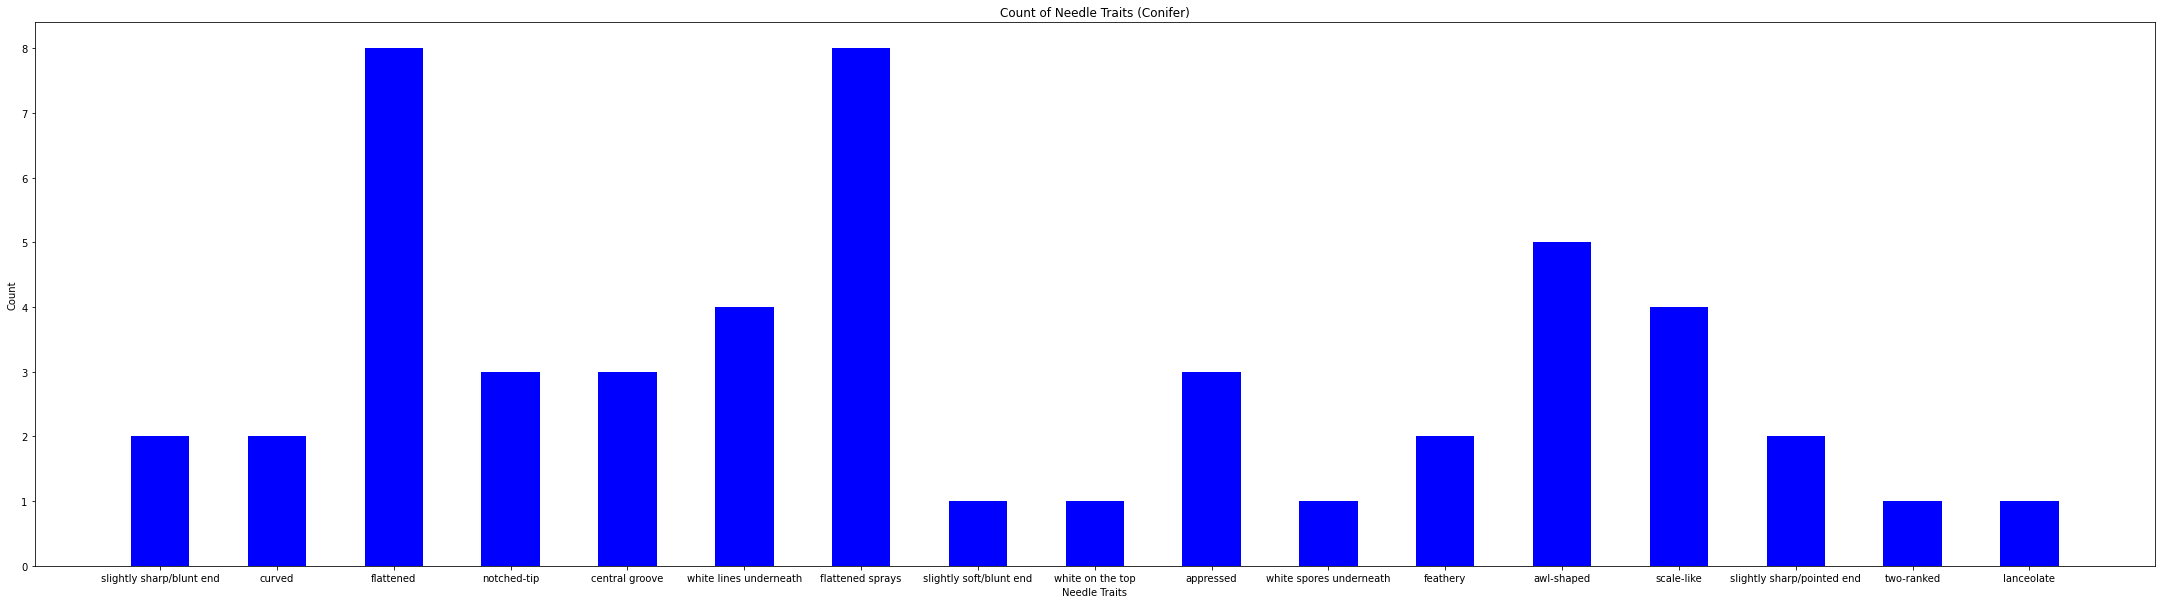



Count of Leaftypes:  {'simple': 38, 'palmately compound': 5, 'pinnately compound': 12, 'bipinnately compound': 5}
Count of blank leaftypes:  226


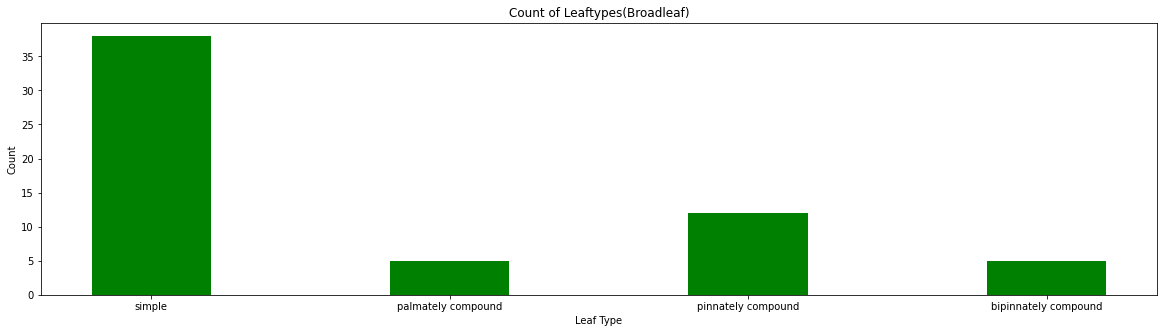



Count of Directions:  {'upright (female)': 6, 'downward (female)': 8, 'outward (female)': 4, 'downward': 2}
Count of blank dirctions:  63


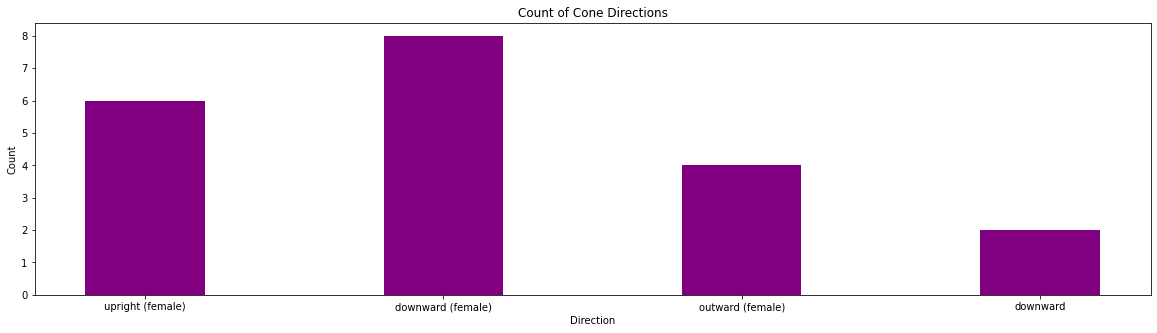



Count of Shapes:  {'barrel-shaped (female)': 4, 'ovoid or egg-shaped (female)': 6, 'globose - round or spherical shape (female)': 6, 'hooked (female)': 2}
Count of blank shapes:  0


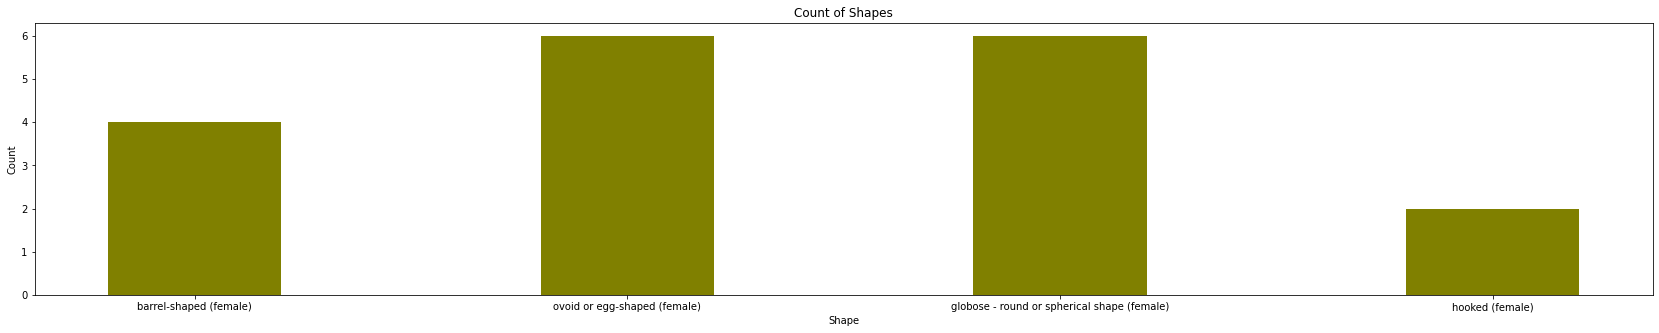

Count of blank colors:  0

List:  {'purple': 4, 'brown (female)': 11, 'yellow': 5, 'green': 4, 'orange': 1, 'grey': 5, 'brown': 5, 'green (female)': 5}


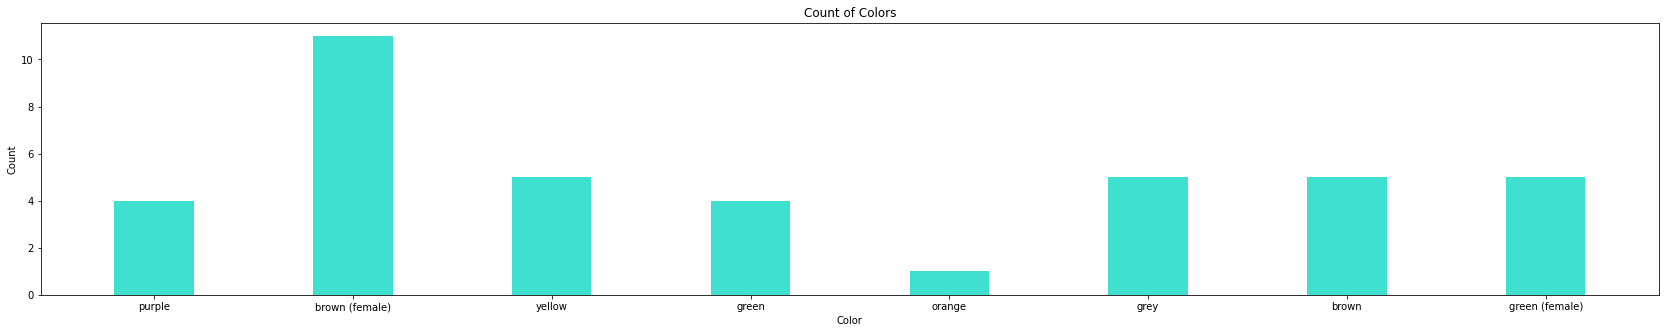

In [ ]:
f = open('/species.json')
species = json.load(f)


##############################################################   BARKTYPE    ###############################################################

barktypes= []
for num in range(len(species['data'])):
    found = species['data'][num]['BARK_TYPE'].split(',')
    barktypes+=found
#count distinct occurrences
dictforcount = {}
count = 0
for bark in barktypes:
  bark = bark.strip()
  if bark:
    if bark in dictforcount:
      dictforcount[bark] +=1
    else:
      dictforcount[bark] =1
  else:
    count+=1
print("\n\nCount of Barktypes",dictforcount)
print("Count of blank barktypes: ",count)
#visualization
categories = list(dictforcount.keys())
count = list(dictforcount.values())
fig = plt.figure(figsize = (25, 5))
plt.bar(categories, count, color ='crimson',
        width = 0.4)
plt.xlabel("Bark types")
plt.ylabel("Count")
plt.title("Count of Barktypes")
plt.show()


##############################################################   NEEDLE TRAITS(CONIFER)    ###############################################################


#counting needle traits
needletraits= []
for num in range(len(species['data'])):
  if("NEEDLE_TRAITS" in species['data'][num]):
    found2 = species['data'][num]['NEEDLE_TRAITS'].split(',')
    needletraits+=found2

dictforcount2 = {}
count = 0
for needle in needletraits:
  needle = (needle.strip()).lower()
  if needle:
    if needle in dictforcount2:
      dictforcount2[needle] +=1
    else:
      dictforcount2[needle] =1
  else:
    count+=1

print("\n\nCount of Needles: ",dictforcount2)
print("Count of blank needles: ", count)
#visualization
categories = list(dictforcount2.keys())
count = list(dictforcount2.values())
fig = plt.figure(figsize = (38, 10))
plt.bar(categories, count, color ='blue',
        width = 0.5)
plt.xlabel("Needle Traits")
plt.ylabel("Count")
plt.title("Count of Needle Traits (Conifer)")
plt.show()

##############################################################   LEAFTYPE(BROADLEAF)    ###############################################################


#counting leaftypes

leaftype= []
for num in range(len(species['data'])):
  if("LEAF_TYPE" in species['data'][num]):
    found3 = species['data'][num]['LEAF_TYPE'].split(',')
    leaftype+=found3

dictforcount3 = {}
count = 0
for leaf in leaftype:
  leaf = (leaf.strip()).lower()
  if leaf:
    if leaf in dictforcount3:
      dictforcount3[leaf] +=1
    else:
      dictforcount3[leaf] =1
  else:
    count+=1

print("\n\nCount of Leaftypes: ",dictforcount3)
print("Count of blank leaftypes: ", count)

#visualization
categories = list(dictforcount3.keys())
count = list(dictforcount3.values())
fig = plt.figure(figsize = (20, 5))
plt.bar(categories, count, color ='green',
        width = 0.4)
plt.xlabel("Leaf Type")
plt.ylabel("Count")
plt.title("Count of Leaftypes(Broadleaf)")
plt.show()


##############################################################   DIRECTION    ###############################################################

#count cone features - counting directions
c_directioncol= []
c_directions = []
for num in range(len(species['data'])):
  if("CONE" in species['data'][num]):
    found4 = species['data'][num]['CONE'].split(',')[0]
    c_directioncol.append(found4)

for direction in c_directioncol:
  dirnow = (re.split(r'/',(direction.strip()).lower()))
  c_directions+=dirnow

dictforcount4 = {}
count = 0
for dir in c_directions:
  dir = (dir.strip()).lower()
  if dir:
    if dir in dictforcount4:
      dictforcount4[dir] +=1
    else:
      dictforcount4[dir] =1
  else:
    count+=1

print("\n\nCount of Directions: ",dictforcount4)
print("Count of blank dirctions: ", count)
#visualization
categories = list(dictforcount4.keys())
count = list(dictforcount4.values())
fig = plt.figure(figsize = (20, 5))
plt.bar(categories, count, color ='purple',
        width = 0.4)

plt.xlabel("Direction")
plt.ylabel("Count")
plt.title("Count of Cone Directions")
plt.show()

##############################################################   SHAPE    ###############################################################


#counting cone features - shapes
c_shapecol = []
c_shapes = []
for num in range(len(species['data'])):
  if("CONE" in species['data'][num]):
    found5 = species['data'][num]['CONE'].split(',',2)[1:2]
    c_shapecol+=found5

for shape in c_shapecol:
  shapenow = (re.split(r'/',(shape.strip()).lower()))
  c_shapes+=shapenow

dictforcount5 = {}
count_s = 0
for sh in c_shapes:
  if sh:
    if sh in dictforcount5:
      dictforcount5[sh] +=1
    else:
      dictforcount5[sh] =1
  else:
    count_s+=1

print("\n\nCount of Shapes: ",dictforcount5)
print("Count of blank shapes: ", count_s)
#visualization
categories = list(dictforcount5.keys())
count = list(dictforcount5.values())
fig = plt.figure(figsize = (29, 5))
plt.bar(categories, count, color ='olive',
        width = 0.4)

plt.xlabel("Shape")
plt.ylabel("Count")
plt.title("Count of Shapes")
plt.show()


##############################################################   COLOR    ######################################################################

c_colorcol = []
c_colors =[]

#separate colors from cone features. This includes slashes
for num in range(len(species['data'])):
  if("CONE" in species['data'][num]):
    found5 = re.split(r',',species['data'][num]['CONE'])[2:3]
    c_colorcol+=found5

#separate each color from color column, (without slashes)
for color in c_colorcol:
  colornow = (re.split(r'/',(color.strip()).lower()))
  c_colors+=colornow



#count each color
dictforcount6 = {}
count_c = 0
for col in c_colors:
  if col:
    if col in dictforcount6:
      dictforcount6[col] +=1
    else:
      dictforcount6[col] =1
  else:
    count_c+=1
print("Count of blank colors: ", count_c)
print("\nList: ",dictforcount6)


#visualization
categories = list(dictforcount6.keys())
count = list(dictforcount6.values())
fig = plt.figure(figsize = (29, 5))
plt.bar(categories, count, color ='turquoise',
        width = 0.4)

plt.xlabel("Color")
plt.ylabel("Count")
plt.title("Count of Colors")
plt.show()



In [ ]:


#########################################################################################################################################################################################
#########################################################################################################################################################################################
##################################### MENU DRIVEN PROGRAM TO RETURN PLANT ID AND COMMON NAME BASED ON CUSTOM FEATURE ENTERED BY THE USER  ###############################################
###########################################################################   AUTHOR: MADHU VP  #########################################################################################
#########################################################################################################################################################################################
#########################################################################################################################################################################################


sel = str(input("b for broadleaf and c for conifer: \n"))

##################################### ----------   FOR BROADLEAF------------ ###################################################################
if sel == 'b': 
  print("the string you entered is: ", sel)
  bl = int(input("\nChoose from the following features:\n1. Barktype\n2. Leaftype\n Make your selection: "))

#################################################      BARKTYPE OPTION     ############################################################################
  if bl == 1: 
    print("\n\n",dictforcount.keys())
    bt  = input("\nEnter your barktype from the above feature list ")
    if bt in dictforcount.keys(): 
      for num in range(len(species['data'])):
        if species['data'][num]['TYPE'].lower() == 'broadleaf' and bt in species['data'][num]['BARK_TYPE'].split(','):
          print("\n Plant ID: ",species['data'][num]['ID']," Common Name: ",species['data'][num]['COMMON'])
    else:
      raise ValueError("The input is not a valid feature")



####################################################    LEAFTYPE OPTION   ########################################################################
  elif bl == 2: #leaftype option
    print("\n\n",dictforcount3.keys())
    lt  = input("\nEnter your LEAFTYPE from the above feature list ")
    if lt in dictforcount3.keys(): #validating that the input is from the list. need an else
      for num in range(len(species['data'])):
        if("LEAF_TYPE" in species['data'][num] and lt in species['data'][num]['LEAF_TYPE'].split(',')):
          print("\n Plant ID: ",species['data'][num]['ID']," Common Name: ",species['data'][num]['COMMON'])
    else:
      raise ValueError("The input is not a valid feature") #handling input that's not from the feature list provided
  else:
    raise ValueError("The input is not a valid broadleaf option") #handling input that's not from the broadleaf menu option




####################################################-----------FOR CONIFER------------ ####################################################################





elif sel == 'c': 
  print("the string you entered is: ", sel)
  cn = int(input("\nChoose from the following features:\n1. Barktype\n2. Needle Traits\n3. Direction \nMake your selection: "))

 #################################################      BARKTYPE OPTION     ############################################################################
 
  if cn == 1:
    print("\n\n",dictforcount.keys())
    bt  = input("\nEnter your barktype from the above feature list ")
    if bt in dictforcount.keys():
      for num in range(len(species['data'])):
        if species['data'][num]['TYPE'].lower() == 'conifer' and bt in species['data'][num]['BARK_TYPE'].split(','):
          print("\n Plant ID: ",species['data'][num]['ID']," Common Name: ",species['data'][num]['COMMON'])
    else:
      raise ValueError("The input is not a valid feature")

 
  #########################################   needle trait option    #######################################################################

  elif cn == 2:
    needletraits = list(dictforcount2.keys())
    dictfordisplay ={}
    print("\n\n",needletraits)
    nt  = input("\nEnter your NEEDLE TRAIT from the above feature list ")
    #validating that the input is from the list.
    if nt in needletraits:
      for num in range(len(species['data'])):
        if("NEEDLE_TRAITS" in species['data'][num] and nt in species['data'][num]['NEEDLE_TRAITS']):
            nt = (nt.strip()).lower()
            dictfordisplay[species['data'][num]['ID']] = species['data'][num]['COMMON']
      print("\n Here's the Plant ID and the common name for the feature ",nt," : \n",dictfordisplay)
    else:
      raise ValueError("The input is not a valid feature") #handling input that's not from the feature list provided

   ###########################################   Direction Option   ######################################################################

  elif cn == 3:
    c_directioncol= []
    c_directions = []
    c_dir = list(dictforcount4.keys())
    dictfordisplaydir = {}
    print("\n\n",c_dir)
    d  = input("\nEnter your DIRECTION from the above feature list ")
    if d in c_dir:
      for num in range(len(species['data'])):
        if("CONE" in species['data'][num] and d in species['data'][num]['CONE']):
          d = (d.strip()).lower()
          print(d)
          dictfordisplaydir[species['data'][num]['ID']] = species['data'][num]['COMMON']
      print("\n Here's the Plant ID and the common name for the feature ",d," : \n",dictfordisplaydir)
    else:
       raise ValueError("The input is not a valid feature") #handling input that's not from the feature list provided



  else:
    raise ValueError("The input is not a valid conifer option") #handling input that's not from the conifer menu option


else:
  raise ValueError("The input is not a valid option")  



b for broadleaf and c for conifer: 
c
the string you entered is:  c

Choose from the following features:
1. Barktype
2. Needle Traits
3. Direction 
4.Shape 
5.Color 
Make your selection: 2


 ['slightly sharp/blunt end', 'curved', 'flattened', 'notched-tip', 'central groove', 'white lines underneath', 'flattened sprays', 'slightly soft/blunt end', 'white on the top', 'appressed', 'white spores underneath', 'feathery', 'awl-shaped', 'scale-like', 'slightly sharp/pointed end', 'two-ranked', 'lanceolate']

Enter your NEEDLE TRAIT from the above feature list lol


ValueError: ignored